In [2]:
import sys
print(sys.executable)

/bin/python3


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder

In [38]:
df=pd.read_csv("Semi_final_data.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10684 entries, 0 to 10683
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10684 non-null  int64 
 1   Id                  10684 non-null  int64 
 2   Locality            10684 non-null  object
 3   Type                10684 non-null  object
 4   SubType             10684 non-null  object
 5   Price               10684 non-null  int64 
 6   Bedrooms            10684 non-null  int64 
 7   Living_Area         10684 non-null  int64 
 8   Is_Equiped_Kitchen  10684 non-null  int64 
 9   Is_Furnished        10684 non-null  int64 
 10  Is_Open_Fire        10684 non-null  int64 
 11  Terrace             10684 non-null  int64 
 12  Terrace_Area        10684 non-null  int64 
 13  Garden              10684 non-null  int64 
 14  Garden_Area         10684 non-null  int64 
 15  Land_Surface        10684 non-null  int64 
 16  State               10

In [40]:

non_numerical_df = df.select_dtypes(include=['object'])
non_numerical_df.columns

Index(['Locality', 'Type', 'SubType', 'Muniplicity', 'Region'], dtype='object')

### Starting with Locality


In [41]:
len(df.Locality.unique())

806

In [42]:
# Initialize the label encoder(each locality to integer)
label_encoder = LabelEncoder()

# Encode the 'Locality' column
df['Locality_encoded'] = label_encoder.fit_transform(df['Locality'])

# Display the result
df[['Locality', 'Locality_encoded']]

,Locality,Locality_encoded
0,Ertvelde,358
1,Hornu,492
2,Beersel,126
3,Geraardsbergen,403
4,Geraardsbergen,403
...,...,...
10679,Blankenberge,180
10680,Knokke,535
10681,Knokke,535
10682,Ingelmunster,509


## Type and subType encoding 

In [43]:
df.Type.value_counts()

Type
Apartment    5745
House        4939
Name: count, dtype: int64

In [44]:
# Binary encoding
df['Type_encoded'] = df['Type'].map({'Apartment': 0, 'House': 1})

# Display the result
print(df[['Type', 'Type_encoded']])

            Type  Type_encoded
0          House             1
1          House             1
2          House             1
3          House             1
4          House             1
...          ...           ...
10679  Apartment             0
10680  Apartment             0
10681  Apartment             0
10682  Apartment             0
10683  Apartment             0

[10684 rows x 2 columns]


In [45]:
len(df.SubType.value_counts())

12

In [46]:
# Label encoding 'SubType' using pandas' factorize method
df['SubType_encoded'] = pd.factorize(df['SubType'])[0]

# Display the result
print(df[['SubType', 'SubType_encoded']].value_counts())

SubType               SubType_encoded
apartment             3                  4525
house                 0                  4197
villa                 1                   347
ground-floor          7                   295
penthouse             8                   246
flat-studio           5                   233
duplex                6                   230
apartment-block       10                  216
mixed-use-building    2                   199
town-house            11                   79
exceptional-property  4                    59
mansion               9                    58
Name: count, dtype: int64


## Encoding Muniplicity and Regions

In [47]:
len(df.Muniplicity.unique())

11

In [48]:
# Label encoding 'Muniplicity' using pandas' factorize method
df['Muniplicity_encoded'] = pd.factorize(df['Muniplicity'])[0]

# Display the result
print(df[['Muniplicity', 'Muniplicity_encoded']].value_counts())

Muniplicity      Muniplicity_encoded
West-Vlaanderen  5                      1844
Brussel          6                      1770
Oost-Vlaanderen  0                      1600
Antwerpen        3                      1503
Luik             10                      976
Vlaams-Brabant   2                       746
Henegouwen       1                       671
Limburg          4                       484
Namen            8                       365
Luxemburg        7                       364
Waals-Brabant    9                       361
Name: count, dtype: int64


In [49]:
# Label encoding 'Region' using pandas' factorize method
df['Region_encoded'] = pd.factorize(df['Region'])[0]

# Display the result
print(df[['Region', 'Region_encoded']].value_counts())


Region    Region_encoded
Falnders  0                 6177
Wallonia  1                 2737
Brussel   2                 1770
Name: count, dtype: int64


In [53]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the result
print(df.head())

         Id        Locality   Type SubType   Price  Bedrooms  Living_Area  \
0  20316087        Ertvelde  House   house  329000         2          123   
1  20316069           Hornu  House   house  180000         3          138   
2  20316048         Beersel  House   house  369000         6          230   
3  20316039  Geraardsbergen  House   house  145000         2           80   
4  20316038  Geraardsbergen  House   house  269000         3          155   

   Is_Equiped_Kitchen  Is_Furnished  Is_Open_Fire  ...  Facades  Swim_pool  \
0                   1             0             0  ...        3          0   
1                   0             0             0  ...        2          1   
2                   0             0             0  ...        3          1   
3                   1             0             0  ...        2          0   
4                   1             0             0  ...        2          0   

       Muniplicity    Region  Surface_total  Locality_encoded  Type_

In [55]:
df.set_index("Id")

,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,...,Facades,Swim_pool,Muniplicity,Region,Surface_total,Locality_encoded,Type_encoded,SubType_encoded,Muniplicity_encoded,Region_encoded
Id,,,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,329000,2,123,1,0,0,1,...,3,0,Oost-Vlaanderen,Falnders,0,358,1,0,0,0
20316069,Hornu,House,house,180000,3,138,0,0,0,1,...,2,1,Henegouwen,Wallonia,278,492,1,0,1,1
20316048,Beersel,House,house,369000,6,230,0,0,0,1,...,3,1,Vlaams-Brabant,Falnders,460,126,1,0,2,0
20316039,Geraardsbergen,House,house,145000,2,80,1,0,0,0,...,2,0,Oost-Vlaanderen,Falnders,160,403,1,0,0,0
20316038,Geraardsbergen,House,house,269000,3,155,1,0,0,1,...,2,0,Oost-Vlaanderen,Falnders,500,403,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,1,...,0,0,West-Vlaanderen,Falnders,171,180,0,3,5,0
8945382,Knokke,Apartment,duplex,699000,4,129,0,0,0,1,...,0,0,West-Vlaanderen,Falnders,258,535,0,6,5,0
8746466,Knokke,Apartment,apartment,950000,2,157,0,0,0,0,...,2,0,West-Vlaanderen,Falnders,314,535,0,3,5,0


In [59]:
numerical_data = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix.Price

Id                     0.031021
Price                  1.000000
Bedrooms               0.354158
Living_Area            0.469745
Is_Equiped_Kitchen     0.057359
Is_Furnished          -0.024984
Is_Open_Fire           0.088585
Terrace                0.111909
Terrace_Area           0.163179
Garden                 0.052013
Garden_Area            0.099540
Land_Surface           0.170649
State                 -0.016617
Facades                0.100192
Swim_pool              0.103847
Surface_total          0.227207
Locality_encoded       0.154906
Type_encoded           0.075502
SubType_encoded        0.076986
Muniplicity_encoded   -0.056789
Region_encoded         0.065164
Name: Price, dtype: float64

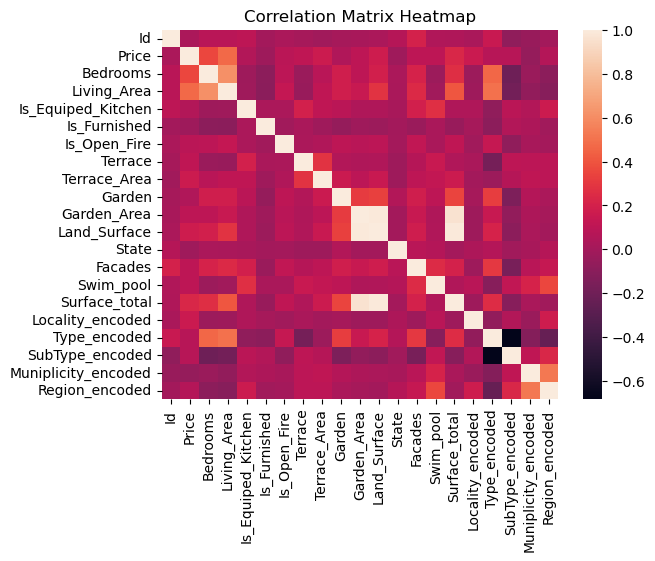

In [58]:
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')

# Save the heatmap image in the 'graphs' folder
plt.savefig('graphs/Encoded_Good_correlation_heatmap.png', bbox_inches='tight')  # Save as PNG in the 'graphs' folder

# Show the plot (optional)
plt.show()

Id                     0.031021
Price                  1.000000
Bedrooms               0.354158
Living_Area            0.469745
Is_Equiped_Kitchen     0.057359
Is_Furnished          -0.024984
Is_Open_Fire           0.088585
Terrace                0.111909
Terrace_Area           0.163179
Garden                 0.052013
Garden_Area            0.099540
Land_Surface           0.170649
State                 -0.016617
Facades                0.100192
Swim_pool              0.103847
Surface_total          0.227207
Locality_encoded       0.154906
Type_encoded           0.075502
SubType_encoded        0.076986
Muniplicity_encoded   -0.056789
Region_encoded         0.065164
Name: Price, dtype: float64


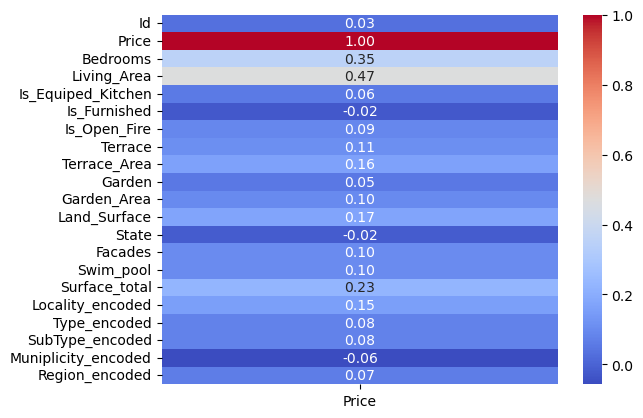

In [60]:
print(correlation_matrix.Price)
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [62]:
# Drop all non-numerical columns
df = df.drop(columns=df.select_dtypes(exclude=['number']).columns)

# Display the result
df.head()

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,...,Land_Surface,State,Facades,Swim_pool,Surface_total,Locality_encoded,Type_encoded,SubType_encoded,Muniplicity_encoded,Region_encoded
0,20316087,329000,2,123,1,0,0,1,0,0,...,142,1,3,0,0,358,1,0,0,0
1,20316069,180000,3,138,0,0,0,1,1,1,...,140,3,2,1,278,492,1,0,1,1
2,20316048,369000,6,230,0,0,0,1,0,0,...,230,5,3,1,460,126,1,0,2,0
3,20316039,145000,2,80,1,0,0,0,0,0,...,80,1,2,0,160,403,1,0,0,0
4,20316038,269000,3,155,1,0,0,1,20,1,...,345,1,2,0,500,403,1,0,0,0


In [ ]:
df.to_csv("Encoded_Data.csv")
